In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import pickle

# load in labels and samples for the training subset
training_samples_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/one_sample/raw_data/training_samples.pkl', 'rb')
training_labels_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/one_sample/raw_data/training_labels.pkl', 'rb')

# load in labels and samples for the test subset
test_samples_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/one_sample/raw_data/test_samples.pkl', 'rb')
test_labels_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/one_sample/raw_data/test_labels.pkl', 'rb')

In [64]:
# training
X = pickle.load(training_samples_file)
y = pickle.load(training_labels_file)

# test
test_samples = pickle.load(test_samples_file)
test_labels = pickle.load(test_labels_file)

In [65]:
# convert X to Numpy array since I forgot to in training data preprocessing 
import numpy as np 
X = np.array(X)

In [66]:
X = X[:600]
y = y[:600]

In [67]:
len(X)

600

In [68]:
len(y)

600

### Build the network 

In [69]:
import tensorflow as tf
import keras
model = keras.Sequential()

In [70]:
model.add(keras.layers.LSTM(64, input_shape=(128, 431), return_sequences=True))

In [71]:
model.add(keras.layers.LSTM(64))

In [72]:
model.add(keras.layers.Dense(64, activation='relu'))

In [73]:
model.add(keras.layers.Dropout(0.3))

In [74]:
model.add(keras.layers.Dense(2, activation='softmax'))

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128, 64)           126976    
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 164,290
Trainable params: 164,290
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [77]:
history = model.fit(X, y, epochs=1000)

Epoch 1/1000
19/19 [==============================] - 3s 20ms/step - loss: 0.6649 - accuracy: 0.5643
Epoch 2/1000
19/19 [==============================] - 0s 15ms/step - loss: 0.2775 - accuracy: 0.9368
Epoch 3/1000
19/19 [==============================] - 0s 15ms/step - loss: 0.2379 - accuracy: 0.9325
Epoch 4/1000
19/19 [==============================] - 0s 14ms/step - loss: 0.1507 - accuracy: 0.9684
Epoch 5/1000
19/19 [==============================] - 0s 14ms/step - loss: 0.1191 - accuracy: 0.9662
Epoch 6/1000
19/19 [==============================] - 0s 14ms/step - loss: 0.1136 - accuracy: 0.9716
Epoch 7/1000
19/19 [==============================] - 0s 14ms/step - loss: 0.1439 - accuracy: 0.9559
Epoch 8/1000
19/19 [==============================] - 0s 15ms/step - loss: 0.1480 - accuracy: 0.9661
Epoch 9/1000
19/19 [==============================] - 0s 14ms/step - loss: 0.0815 - accuracy: 0.9844
Epoch 10/1000
19/19 [==============================] - 0s 14ms/step - loss: 0.0836 - accura

In [78]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
def plot_training(history_dict):
	"""
	Plots the training accuracy and loss graphs for a Keras model (validation graphs not included). 
	Parameters:
		- history_dict: a dictionary of "history" object from Keras 
	"""
	# plot training accuracy graph 
	plt.plot(history_dict['accuracy'])
	plt.title('Training Accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train'], loc='upper left')
	plt.show()

	# plot training loss graph 
	plt.plot(history_dict['loss'])
	plt.title('Training Loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train'], loc='upper left')
	plt.show() 

In [79]:
history_dict = history.history
print(history_dict.keys())
# to keep for later 
%store history_dict

dict_keys(['loss', 'accuracy'])
Stored 'history_dict' (dict)


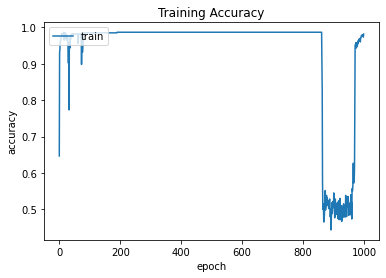

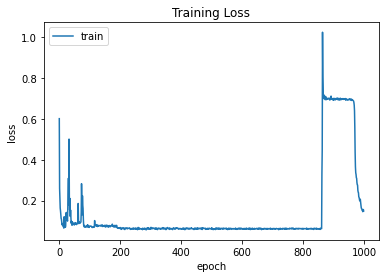

In [80]:
plot_training(history_dict)

Very interesting stuff going on from 800 to 1000. 

In [81]:
test_loss, test_accuracy = model.evaluate(test_samples,  test_labels, verbose=2)
print('Test accuracy:', test_accuracy)

11/11 - 1s - loss: 0.3310 - accuracy: 0.9571
Test accuracy: 0.9570552110671997


Good overall accuracy! 

In [82]:
predictions = model.predict_classes(test_samples) # generates a list of predictions

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [83]:
print("Test labels: \n", test_labels)
print("Test predictions: \n", predictions)

Test labels: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Test predictions: 
 [1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 

In [84]:
correct = 0
for i in range(len(predictions)):
  if predictions[i] == test_labels[i]:
    correct += 1

In [85]:
predictions_accuracy = correct/len(test_labels)
predictions_accuracy

0.9570552147239264

In [86]:
print("The accuracy is: " + str(round(predictions_accuracy * 100, 1)) + "%")

The accuracy is: 95.7%


In [87]:
speech_correct = 0
for i in range(len(test_labels[:33])):
    if predictions[i] == test_labels[i]:
      speech_correct += 1

In [88]:
speech_correct/len(test_labels[:33])

0.7878787878787878

Roughly **80%** on speech classes. 

In [89]:
# make confusion matrix 
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

In [90]:
cm = confusion_matrix(test_labels, predictions)

In [91]:
def plot_cm(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astypea('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix without normalization')

  print(cm)

  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion matrix without normalization
[[286   7]
 [  7  26]]


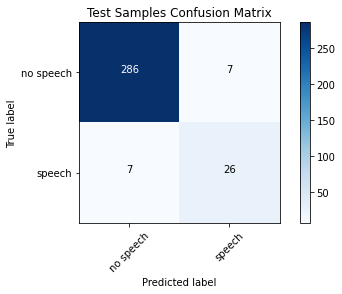

In [92]:
plot_cm(cm, ['no speech','speech'], title='Test Samples Confusion Matrix')